In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r"train.csv")
train.head()
train.shape

(614, 13)

In [3]:
test = pd.read_csv(r"test.csv")
test.head()
test.shape


(367, 12)

In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.shape


(614, 13)

In [9]:
test.shape


(367, 12)

In [10]:
train['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train['Loan_Status'].value_counts(normalize=True) 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot: >

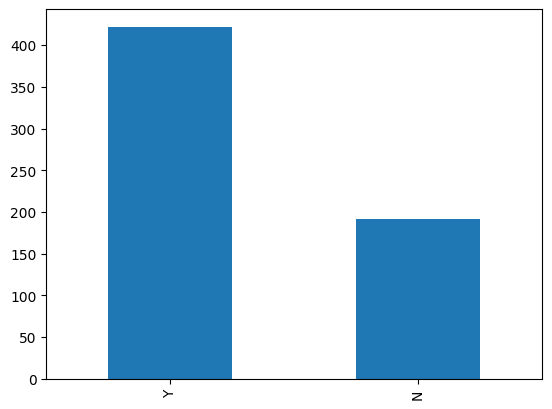

In [12]:
train['Loan_Status'].value_counts().plot.bar()


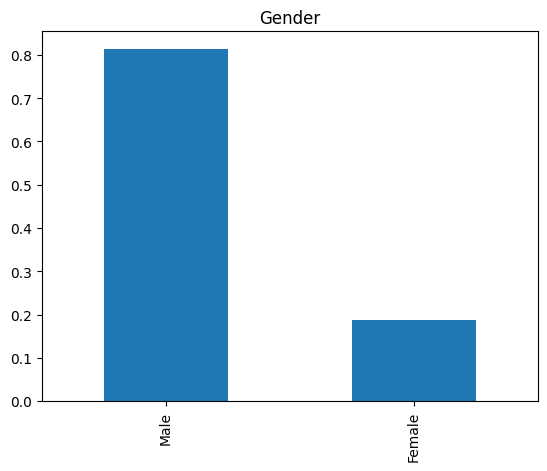

In [13]:
train['Gender'].value_counts(normalize=True).plot.bar( title='Gender')
plt.show()


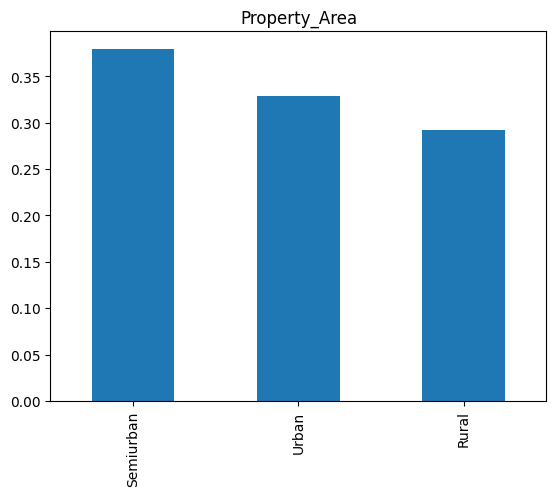

In [14]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

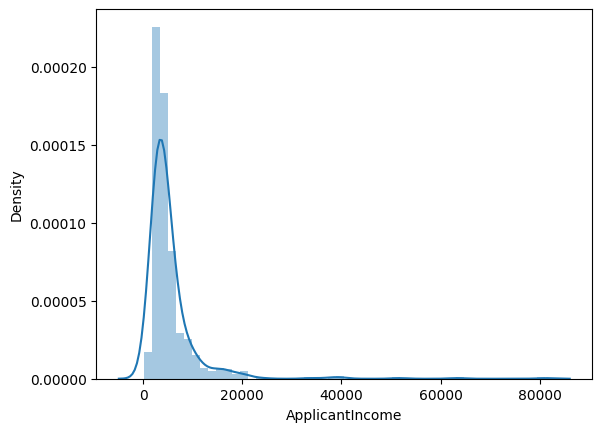

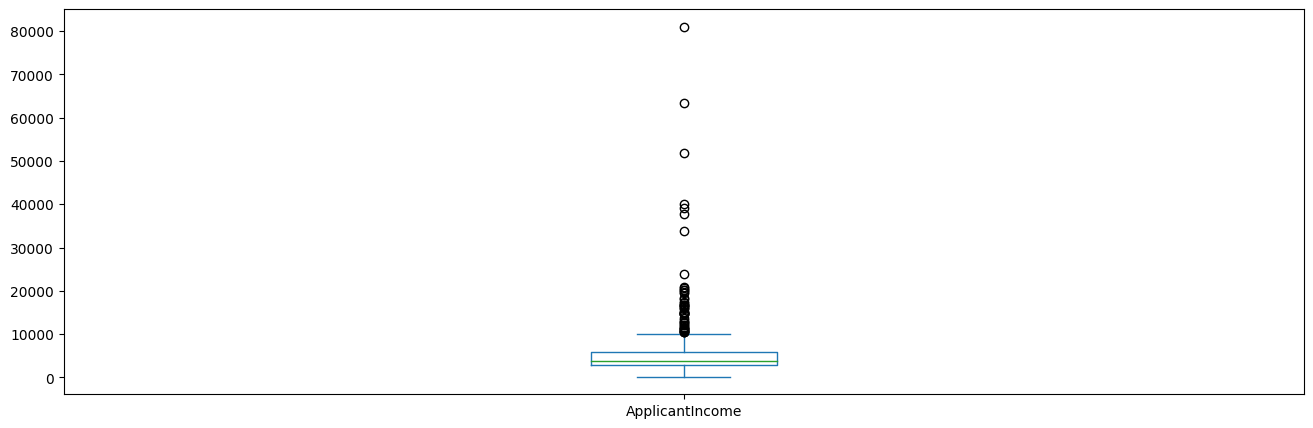

In [15]:
sns.distplot(train["ApplicantIncome"])
plt.show()
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

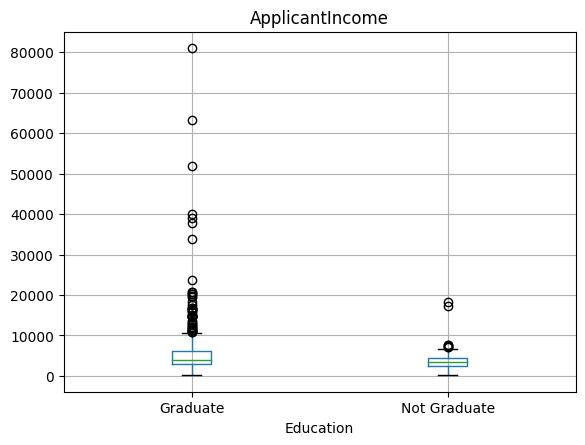

In [16]:
train.boxplot(column="ApplicantIncome", by = "Education") 
plt.suptitle("")

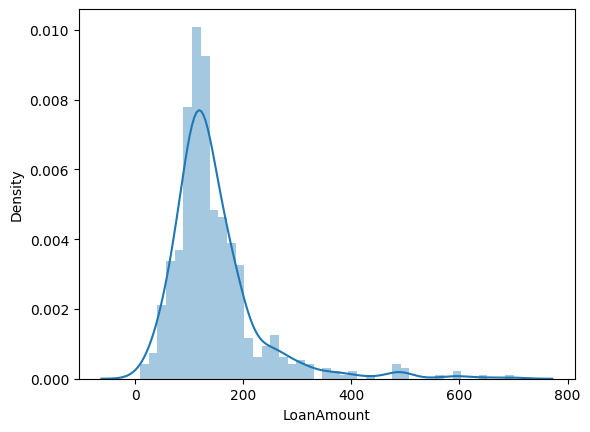

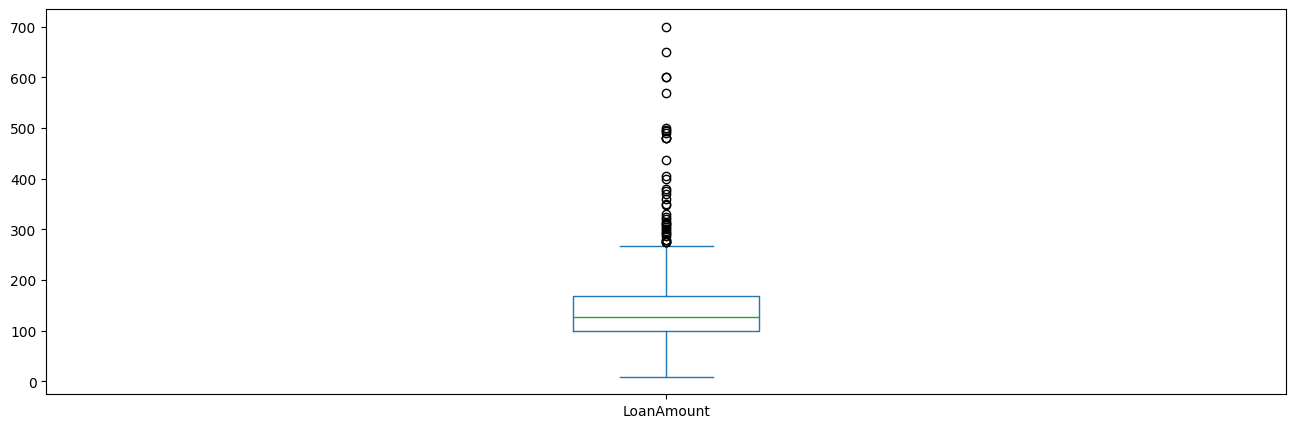

In [17]:
train.notna()
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

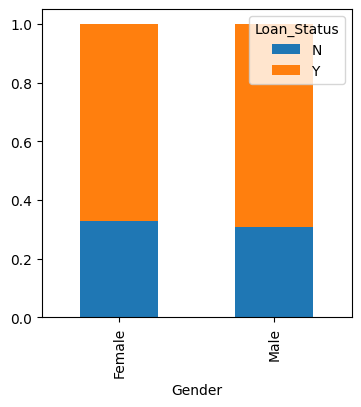

In [18]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

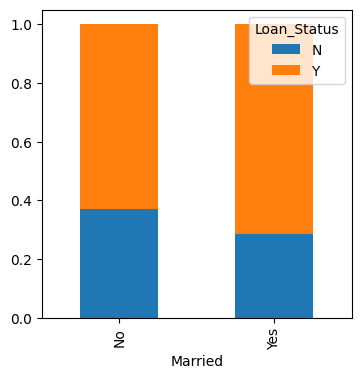

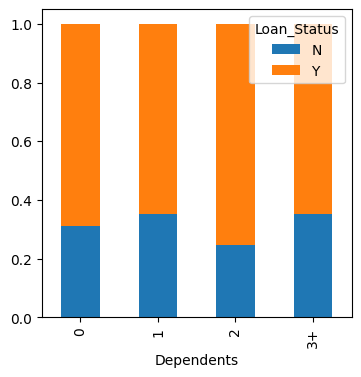

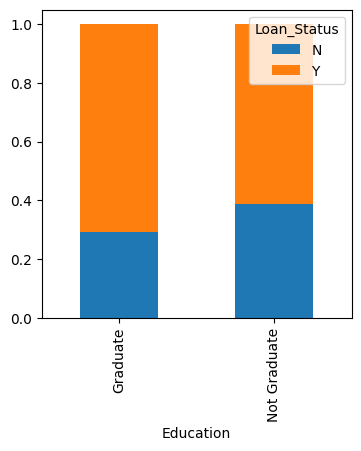

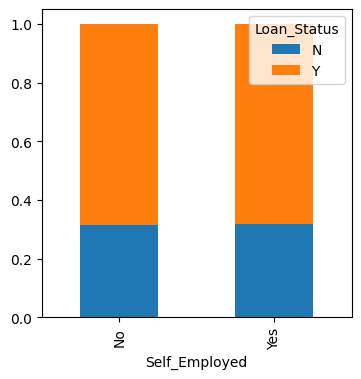

In [19]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()


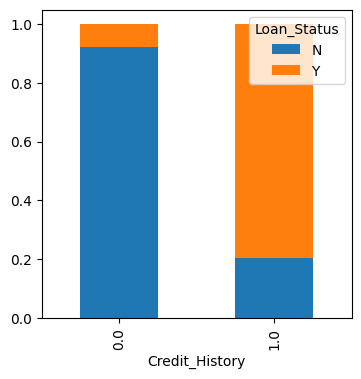

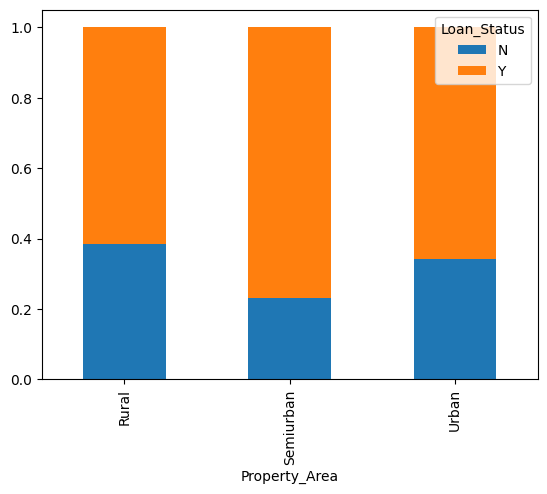

In [20]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

<AxesSubplot: xlabel='Loan_Status'>

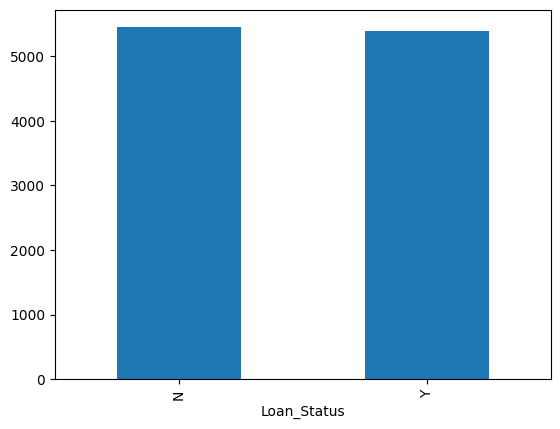

In [21]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

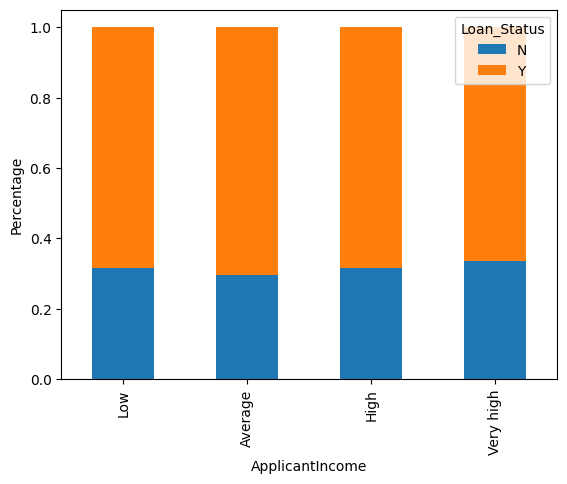

In [22]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

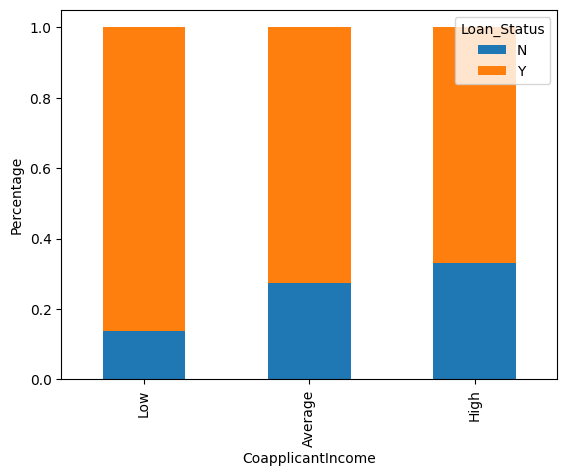

In [23]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

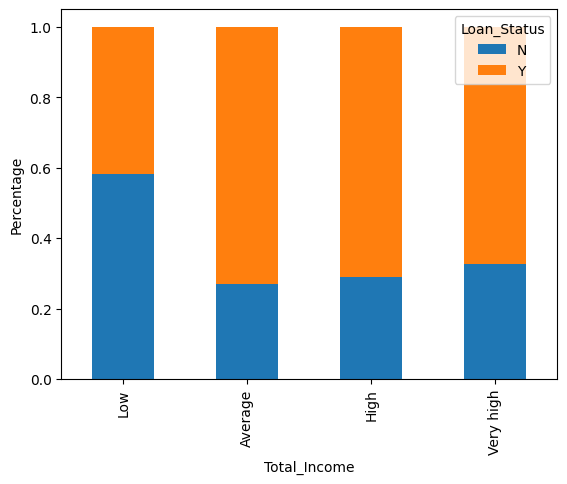

In [24]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

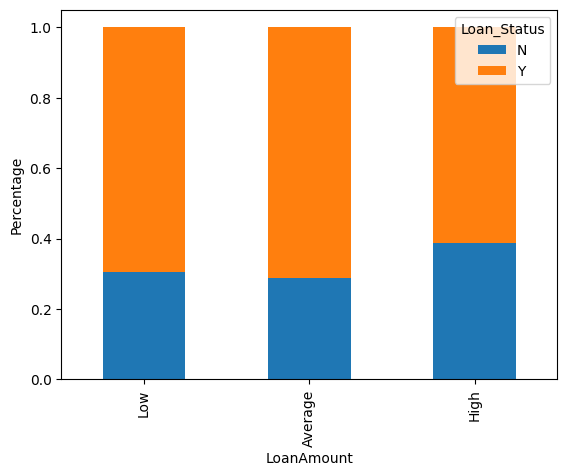

In [25]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [26]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot: >

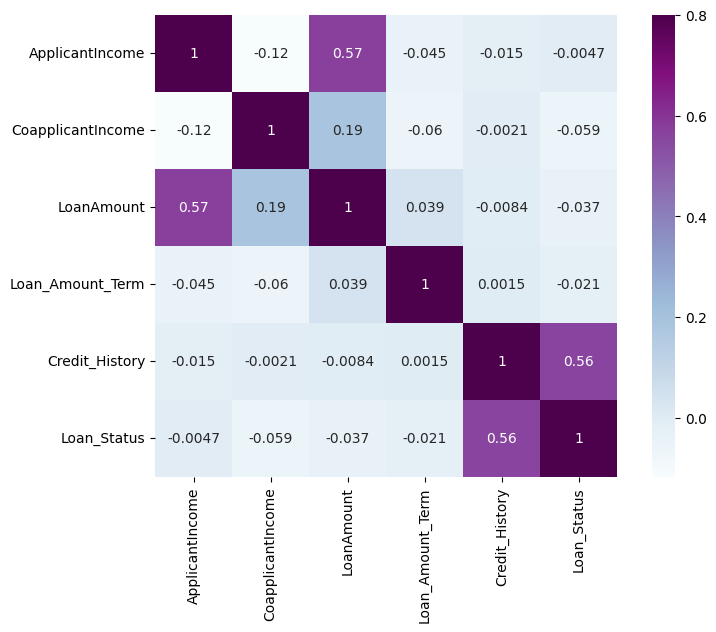

In [27]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [28]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [29]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [30]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [31]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

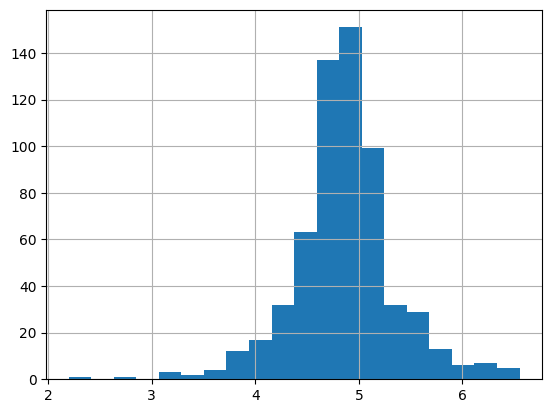

In [32]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [33]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [34]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [35]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(x_cv)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_cv, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_cv, y_pred)

    categories  = ['NO','YES']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

LOGISTIC REGRESSION

              precision    recall  f1-score   support

           0       0.97      0.45      0.61        65
           1       0.77      0.99      0.87       120

    accuracy                           0.80       185
   macro avg       0.87      0.72      0.74       185
weighted avg       0.84      0.80      0.78       185



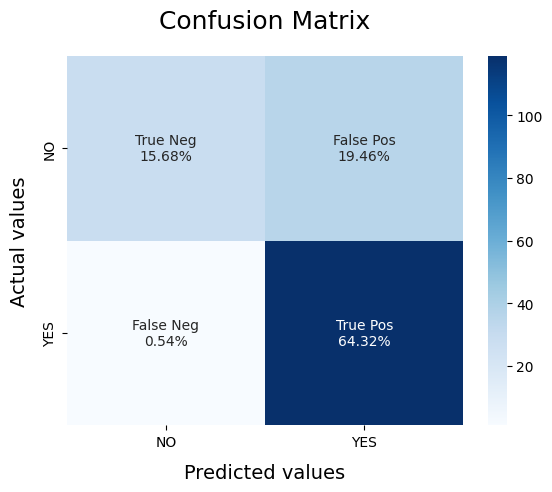

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Lmodel = LogisticRegression(C = 2, max_iter = 20000, n_jobs=-1)
Lmodel.fit(x_train, y_train)
model_Evaluate(Lmodel)

In [39]:
pred_cv = Lmodel.predict(x_cv)
accuracy_score(y_cv,pred_cv)


0.8

In [40]:
pred_test = Lmodel.predict(test)

In [41]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [42]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [43]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [44]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [45]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [46]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log1.csv')

In [47]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

<AxesSubplot: xlabel='Total_Income', ylabel='Density'>

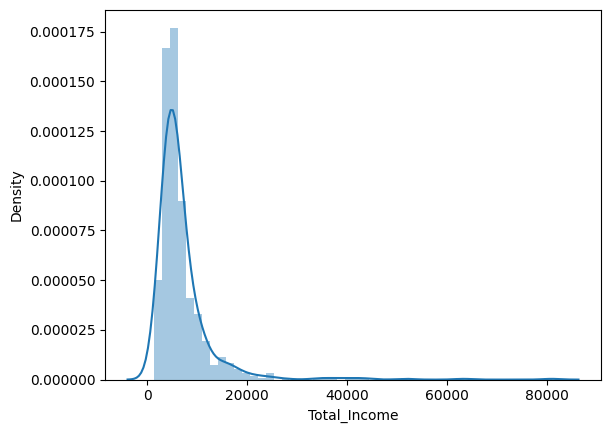

In [48]:
sns.distplot(train['Total_Income'])

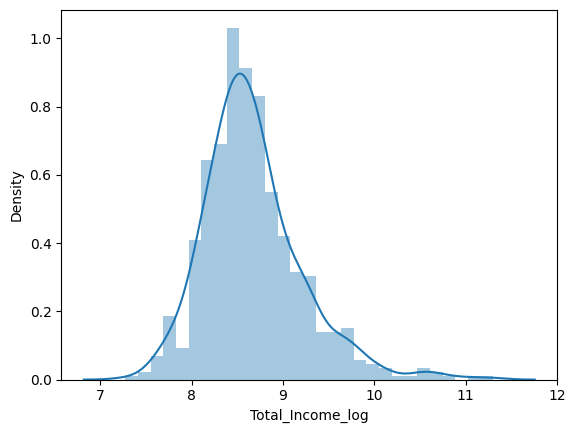

In [49]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [50]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

<AxesSubplot: xlabel='EMI', ylabel='Density'>

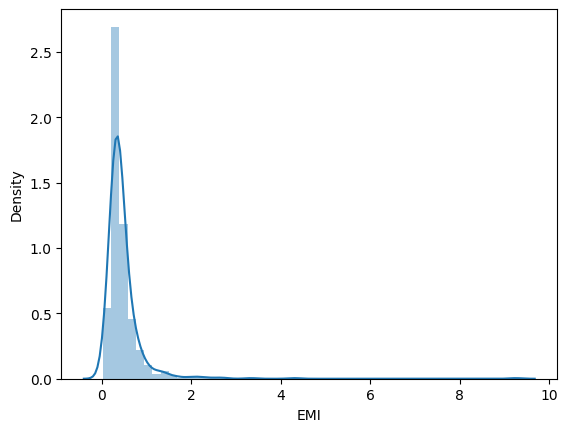

In [51]:
sns.distplot(train['EMI'])

<AxesSubplot: xlabel='Balance Income', ylabel='Density'>

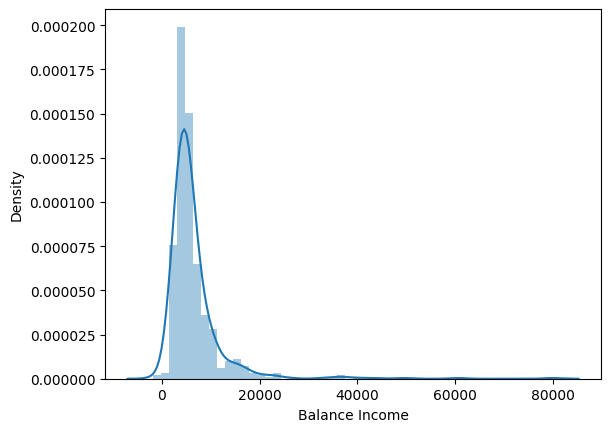

In [52]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [53]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [54]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

DECISION TREE USING STRATIFIED K FOLD

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=None,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('DecisionTree.csv')


1 of kfold 5 
accuracy_score 0.6341463414634146

2 of kfold 5 
accuracy_score 0.6910569105691057

3 of kfold 5 
accuracy_score 0.6910569105691057

4 of kfold 5 
accuracy_score 0.7154471544715447

5 of kfold 5 
accuracy_score 0.6721311475409836

 Mean Validation Accuracy 0.6807676929228308


RANDOM FOREST USING STRATIFIED K FOLD

In [56]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=None,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))



1 of kfold 5 
accuracy_score 0.8048780487804879

2 of kfold 5 
accuracy_score 0.8048780487804879

3 of kfold 5 
accuracy_score 0.8617886178861789

4 of kfold 5 
accuracy_score 0.7479674796747967

5 of kfold 5 
accuracy_score 0.7704918032786885

 Mean Validation Accuracy 0.798000799680128


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)

x_train, x_val, Y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 2)

ANN model

In [58]:
import keras
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, InputLayer, Embedding
from tensorflow.keras.models import Model
from keras.models import Sequential

In [59]:
# Input neurons
input_neurons = X_train.shape[1]
# Output neurons (Since it is binary classification)
output_neurons = 1
# Defining hidden layers & neurons in each layersnumber_of_hidden_layers = 2
neuron_hidden_layer_1         = 1000
neuron_hidden_layer_2         = 50
neuron_hidden_layer_3         = 100
neuron_hidden_layer_4         = 500
neuron_hidden_layer_5         = 1000
neuron_hidden_layer_6         = 400
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dropout(0.3, seed=0))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dropout(0.3, seed=0))
model.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=neuron_hidden_layer_5, activation='relu'))
model.add(Dropout(0.3, seed=0))
model.add(Dense(units=neuron_hidden_layer_6, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=output_neurons, activation='sigmoid'))


In [60]:
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [61]:
model_history = model.fit(X_train, y_train, batch_size=100,epochs = 5)

Epoch 1/5
6/6 [==============================] - 2s 19ms/step - loss: 235.7495 - accuracy: 0.6123
Epoch 2/5
6/6 [==============================] - 0s 21ms/step - loss: 5.0222 - accuracy: 0.5435
Epoch 3/5
6/6 [==============================] - 0s 19ms/step - loss: 3.0797 - accuracy: 0.5018
Epoch 4/5
6/6 [==============================] - 0s 16ms/step - loss: 1.4965 - accuracy: 0.6286
Epoch 5/5
6/6 [==============================] - 0s 17ms/step - loss: 1.0901 - accuracy: 0.6504


In [62]:
accr1 = model.evaluate(x_train, Y_train)

16/16 [==============================] - 0s 5ms/step - loss: 0.6832 - accuracy: 0.6875


In [63]:
from sklearn.metrics import confusion_matrix, classification_report
# Getting predictions for the test set
prediction = model.predict(X_test)
# Getting accuracy score
prediction=(prediction>0.5)
print(classification_report(y_test,prediction))

2/2 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62

